In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LOAD DATA

In [92]:
df = pd.read_csv("../data/clothes_size.csv")

In [93]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [94]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [96]:
df['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

In [97]:
len(df['size'].unique())

7

In [98]:
df['height'].mean()

165.80579427826837

# DATA CLEANING

In [99]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [100]:
mean_age = df['age'].mean()
mean_height = df['height'].mean

In [101]:
df.fillna(mean_age, inplace=True)

In [102]:
df.fillna(mean_height, inplace=True)

In [103]:
df.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

# DATA VISUALIZING

In [104]:
import seaborn as sns

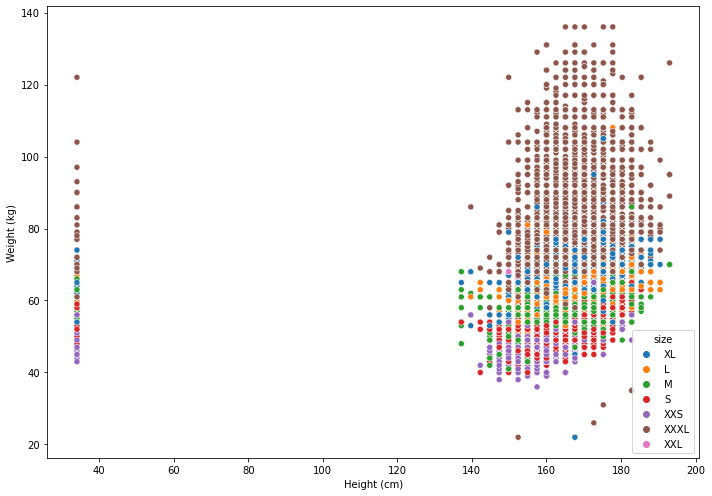

In [105]:
plt.figure(figsize=(10,7), tight_layout=True)
sca = sns.scatterplot(data=df,x='height', y='weight', hue='size')
sca.set(xlabel='Height (cm)', ylabel='Weight (kg)')
sca.legend(title="size", title_fontsize=10)

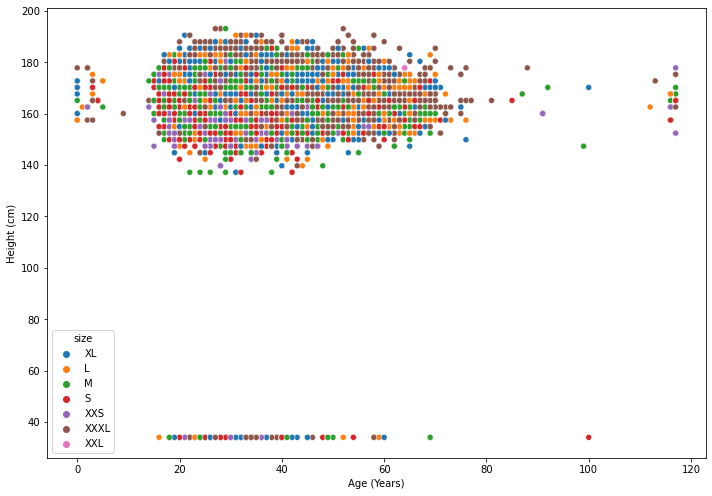

In [106]:
plt.figure(figsize=(10,7), tight_layout=True)
sca = sns.scatterplot(data=df,x='age', y='height', hue='size')
sca.set(xlabel='Age (Years)', ylabel='Height (cm)')
sca.legend(title="size", title_fontsize=10)

In [107]:
df.columns

Index(['weight', 'age', 'height', 'size'], dtype='object')

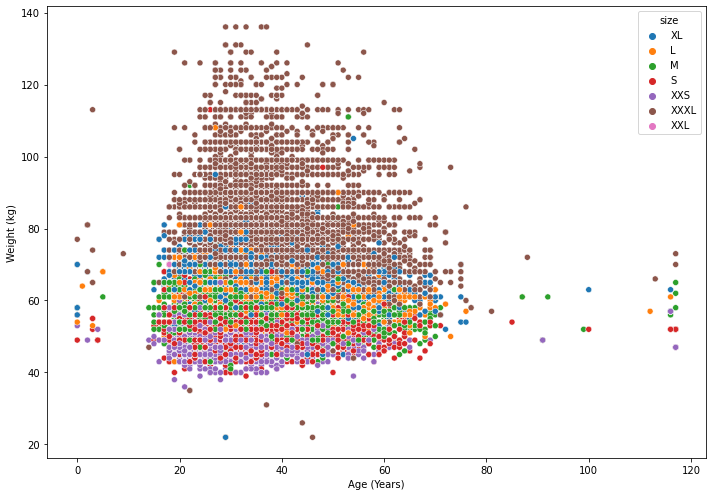

In [108]:
plt.figure(figsize=(10,7), tight_layout=True)
sca = sns.scatterplot(data=df,x='age', y='weight', hue='size')
sca.set(xlabel='Age (Years)', ylabel='Weight (kg)')
sca.legend(title="size", title_fontsize=10)

Text(0.5, 1.0, 'Age vs Size')

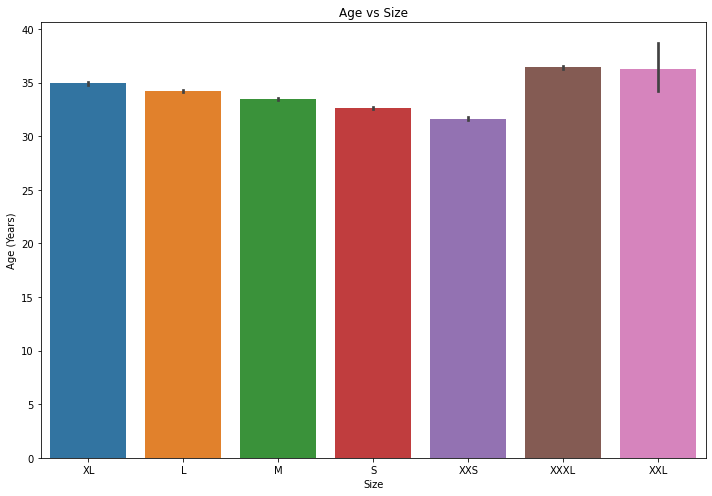

In [109]:
plt.figure(figsize=(10,7), tight_layout=True)
_barplot = sns.barplot(data=df, x='size', y='age')
_barplot.set(xlabel="Size", ylabel="Age (Years)")
plt.title("Age vs Size")

<AxesSubplot:xlabel='size', ylabel='count'>

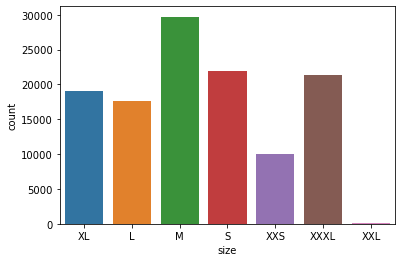

In [110]:
sns.countplot(data=df, x='size')

# FEATURE ENGINEERING

In [111]:
age_15_and_70 = (df['age'] >= 15) & (df['age'] < 70)

age_15_and_70 = list(age_15_and_70)

if set(age_15_and_70).issubset(df.columns):
    df = df[age_15_and_70].copy()
else:
    print(f"No such a column")
    
df.head(10)

No such a column


,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
5,50,27.0,160.02,S
6,53,65.0,160.02,M
7,51,33.0,160.02,XXS
8,54,26.0,167.64,M
9,53,32.0,165.10,S


# TRAIN AND SPLIT

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [113]:
# lb = LabelBinarizer()

In [114]:
X = df.iloc[:,:-1]
y = df['size']

In [115]:
# y = lb.fit_transform(y)

In [116]:
y

0         XL
1          L
2          M
3          L
4          M
          ..
119729     M
119730     S
119731     M
119732    XL
119733    XL
Name: size, Length: 119734, dtype: object

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# MODEL

In [118]:
#The predicition is done using Decition Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [119]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

pred

array(['M', 'XL', 'XXXL', ..., 'L', 'XL', 'XL'], dtype=object)

SAVE MODEL

In [120]:
from joblib import dump, load

dump(model, "cloth_size_prediction.sav")

['cloth_size_prediction.sav']

In [121]:
md = load("cloth_size_prediction.sav")

# MODEL EVALUTION AND SCORE

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [123]:
print("\n=======Classification Report=====\n\n")

print(classification_report(y_test, pred))

print("\n=======Confusion Matrix=====\n\n")

print(confusion_matrix(y_test, md))

print("\n=======Accuracy=====\n\n")

print(accuracy_score(y_test, pred)*100)


=======Classification Report=====


              precision    recall  f1-score   support

           L       0.34      0.32      0.33      5251
           M       0.47      0.57      0.52      8912
           S       0.48      0.50      0.49      6643
          XL       0.43      0.39      0.41      5721
         XXL       0.00      0.00      0.00        17
         XXS       0.53      0.37      0.44      2926
        XXXL       0.77      0.72      0.74      6451

    accuracy                           0.50     35921
   macro avg       0.43      0.41      0.42     35921
weighted avg       0.51      0.50      0.50     35921


=======Confusion Matrix=====




TypeError: Expected sequence or array-like, got <class 'sklearn.tree._classes.DecisionTreeClassifier'>

# PREDICT

In [124]:
df.head(10)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
5,50,27.0,160.02,S
6,53,65.0,160.02,M
7,51,33.0,160.02,XXS
8,54,26.0,167.64,M
9,53,32.0,165.10,S


In [125]:
predict = {'weight':[51], 'age':[33], 'height':[160]}
predict_df = pd.DataFrame(data=predict)
predict_df

,weight,age,height
0,51,33,160


In [126]:
md.predict(predict_df)[0]
# md.predict(predict_df[0])

'S'

DEPLOYMENT CODE

In [127]:
import numpy as np
from joblib import load

cloth_model = load('cloth_size_prediction.sav')
def get_cloth(w, a, h):
    sample_data = {'weight':[w], 'age':[a], 'height':[h]}
    clothdf = pd.DataFrame(data=sample_data)
    return clothdf

def return_cloth(model):
    weight = int(input("Enter Your Weight (in Kg): \n"))
    age = int(input("Enter Your Age (in Years): \n"))
    height = int(input("Enter Your Height(in cm): \n"))

    return model.predict(get_cloth(weight, age, height))[0]

print(return_cloth(cloth_model))


S
